In [4]:
#testGetFullDF
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import yahoo_fin.stock_info as yf
import numpy as np
from stage import getStage, fullPrint
import pickle
from datetime import datetime, timedelta
now = datetime.now()
import matplotlib.pyplot as plt
import investpy

In [ ]:
#test_train_test_split
nasdaqList = yf.tickers_nasdaq()
train, test = train_test_split(nasdaqList, test_size=0.3, random_state=0, shuffle=True)
print(train)
print(test)


In [5]:
dfSorted = pd.read_pickle("stockData/nyseNasdaq/AAPL.pkl")
dfSorted.to_csv("sampleDfSorted.csv")

In [11]:
transactionFit = pd.read_pickle("transactionTemplate.pkl")
transactionFit['holding'] = np.empty((len(transactionFit), 0)).tolist()
transactionFitCopy = transactionFit
transactionFitCopy['total'] = 0
transactionFitCopy.to_csv("transactionTemplateCopy.csv")

In [1]:
SectorDict = {
    "Energy":"XLE","Technology":"XLK",
    "Communication Services":"XLC",
    "Consumer Staples":"XLP",
    "Health Care":"XLV",
    "Consumer Cyclical":"XLY",
    "Industrial":"XLI",
    "Utilities":"XLU",
    "Materials":"XLB",
    "Financial":"XLF",
    "Real Estate":"XLRE"}
sectorDfList = []
for sector in SectorDict.values():
    sectorDfList.append(pd.read_pickle("stockData/sectorCharts/"+sector+".pkl"))
    goodSectorDf = sectorDfList[0].drop(['open','high','low','adjclose','close','ticker','volume','percent','MA30','MA30Slope','RS'],axis=1)
    goodSectorDf['Sectors'] = [[] for _ in range(len(goodSectorDf))]
    goodSectorDf.index = sectorDfList[0].index
    index = 0
    for date in sectorDfList[0].index:
        listOfSector = []
        for df in sectorDfList:
            try:
                # print(df.at[date,'MA30Slope'],df.at[date,'RS'])
                # print(individual[0][9],individual[0][10])
                if  df.at[date,'MA30Slope'] > 0 or df.at[date,'RS'] > 0.1:
                    # if df.at[date,'close'] > df.at[date,'MA30']:
                        # print(df.at[date,'ticker'])
                    listOfSector.append(df.at[date,'ticker'])
            except:
                listOfSector.append(df.iat[-1,6]) 
                pass
            # print(listOfSector)
        goodSectorDf.iat[index,0] = set(listOfSector)
        index = index + 1
stockDataTickerList = pd.read_pickle("stockData/tickerList.pkl")
removeList = []
from stage import getStage
for ticker in stockDataTickerList:
    try:
        getStage(ticker,[0.9630183179676801, 1.3518854933368092, 0.16319993430933552, 1.0537971763840923, 1.006835620568861, 1.0103606174928899, 0.9033455933504492, 0.9731546594459972, 1.46426124905874, 0.9991612063815158, 0.09863994265206354, 0.9826811057391516, 0.9949684774619274, 0.8670538938494661, 0.9895837713208671],goodSectorDf)
    except:
        print(ticker)
        removeList.append(ticker)

DAVE
DPRO
FICV
GBNH
HCVIW
NHICW
PBAXW
PEGRW
PRLHW
RDIB
SAMAW
SANG
SCMAW
SMAPW
USCTW
VMGAW
ZIONP


In [2]:
for ticker in removeList:
    stockDataTickerList.remove(ticker)
for ticker in removeList:
    if ticker in stockDataTickerList:
        print("Broken")

In [3]:
with open('stockData/tickerList.pkl', 'wb') as f:
    pickle.dump(stockDataTickerList, f)

In [2]:
getStage("AFRM",[0.03361077383204303, 1.7466372328111242, -0.08498841770875612, 0.926192276854965, 1.1764676012556523, 1.1405501342698643, 0.8517616225271734, 0.8691969716399011, 1.268490629719207, 1.0013386634337298, 0.07551020458494859, 0.9489349345040117, 0.996709764664632, 0.9485725801058837, 0.9857019510456804],goodSectorDf)

In [21]:
df = pd.read_pickle("transactionTemplate.pkl")
df.to_csv("transactionTemplate.csv")


In [6]:
now = datetime.now()
yf.get_data('AAPL', start_date="1995-01-06",end_date= now, index_as_date = True).drop(['open','high','low','close','adjclose','volume','ticker'],axis=1).to_csv("AAPL.csv")

In [5]:
def calculateGroupReturn(list):
    monthlyReturn = pd.read_pickle("transactionTemplate.pkl")
    monthlyReturn = monthlyReturn.resample('M').mean()
    monthlyReturn.index = monthlyReturn.index.strftime("%Y:%m")
    currentColumn = -1
    for symbol in list:
        if symbol in monthlyReturn.columns:
            continue
        try:
            df = pd.read_pickle("stockData/nyseNasdaq/"+symbol+".pkl")
        except:
            print(symbol)
            continue
        if not (df['close'] != 0).all() or df.empty:
            if df.empty:
                print(symbol)
            continue
        monthlyReturn[symbol] = 1
        currentColumn += 1
        monthCheck = df.index[0].strftime("%Y:%m")
        lastPrice = df.iat[0,0]
        initialPrice = df.iat[0,0]
        for index, element in df.iterrows():
            if (index.strftime("%Y:%m") != monthCheck):
                if (initialPrice == 0): continue
                if (lastPrice / initialPrice >= 1.01 and lastPrice / initialPrice < 2):
                    rowNumber = monthlyReturn.index.get_loc(index.strftime("%Y:%m"))
                    monthlyReturn.iat[rowNumber, currentColumn] = (lastPrice / initialPrice)
                initialPrice = element[0]
                lastPrice = element[0]
                monthCheck = index.strftime("%Y:%m")
            lastPrice = element[0]
    return monthlyReturn


In [6]:
## Get list of returns of tickers
nasdaqList = pd.read_pickle("stockData/tickerList.pkl")
listOfDf = calculateGroupReturn(nasdaqList)

/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

CONE


/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  monthlyReturn[symbol] = 1
/var/folders/1q/w3g5nkks29g3kjdwmq1lssj00000gn/T/ipykernel_48519/4014016260.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfor

In [33]:
## Initialize Test/Train Stock Lists and Check test vs train return
train, test = train_test_split(nasdaqList, test_size=0.3, shuffle=True)
testTrainR = []
def calculateTestTrainRatio(train,test):
    testTrainRatio = [1,1]
    for i in range(2):
        if i == 0:
            l = test
        else:
            l = train
        index = 0
        while index != len(l):
            if l[index] not in listOfDf.columns:
                l = np.delete(l, index)
            else:
                index += 1
        for index, element in listOfDf[l].iterrows():
            #print(element.to_list())
            listOfStockRet = element.to_list()
            while 1.0 in listOfStockRet:
                listOfStockRet.remove(1.0)
            if len(listOfStockRet) != 0:
                testTrainRatio[i] = testTrainRatio[i] * np.mean(listOfStockRet)     
    testTrainRatio[1] = testTrainRatio[1] / testTrainRatio[0]
    testTrainRatio[0] = 1
    return testTrainRatio
testTrainR = calculateTestTrainRatio(train,test)
while(abs(1-testTrainR[1])/np.average(testTrainR)>0.2):
    train, test = train_test_split(nasdaqList, test_size=0.3, shuffle=True)
    testTrainR = calculateTestTrainRatio(train,test)
print(testTrainR)

[1, 1.070530087902173]


In [32]:
np.random.shuffle(train)
## Calculate (and normalize) returns of each folds 
trainSet1, trainSet2, trainSet3  = np.array_split(train,3,)
trainSets = [trainSet1, trainSet2, trainSet3]
trainSetsR = []
def trainSetsRatio(ratio):
    ratio = [1,1,1,1,1,1]
    for i in range(6):
        if i < 3:
            l = trainSets[i]
        else:
            l = np.concatenate((trainSets[(i+1)%3],trainSets[(i+2)%3]))
        index = 0
        while index != len(l):
            if l[index] not in listOfDf.columns:
                l = np.delete(l, index)
            else:
                index += 1
        for index, element in listOfDf[l].iterrows():
            #print(element.to_list())
            listOfStockRet = element.to_list()
            while 1.0 in listOfStockRet:
                listOfStockRet.remove(1.0)
            if len(listOfStockRet) != 0:
                ratio[i] = ratio[i] * np.mean(listOfStockRet)     
    for i in range(1,6):
        ratio[i] = ratio[i] / ratio[0]
    ratio[0] = 1.0
    return ratio
trainSetsR = trainSetsRatio(trainSetsR)
while(np.std(trainSetsR)/np.average(trainSetsR)>0.2):
        np.random.shuffle(train)
        trainSet1, trainSet2, trainSet3  = np.array_split(train,3)
        trainSets = [trainSet1, trainSet2, trainSet3]
        trainSetsR = trainSetsRatio(trainSetsR)
print(np.std(trainSetsR)) 
print(np.std(trainSetsR)/np.average(trainSetsR))
print(trainSetsR)

0.11606880806772112
0.12620387153796947
[1.0, 1.0421964479476165, 0.7176111432736034, 0.8732677252719678, 0.8549653176419437, 1.0301169304432674]


In [4]:
spDf = yf.get_data('^IXIC', start_date="1995-01-06",end_date = now, index_as_date = True)
print(spDf)

                    open          high           low         close  \
1995-01-06    746.270020    750.729980    745.760010    749.690002   
1995-01-09    750.190002    752.840027    750.099976    752.090027   
1995-01-10    754.270020    759.219971    754.270020    756.520020   
1995-01-11    758.140015    760.049988    751.700012    755.739990   
1995-01-12    755.659973    757.049988    754.650024    756.510010   
...                  ...           ...           ...           ...   
2022-03-31  14444.780273  14456.740234  14217.719727  14220.519531   
2022-04-01  14269.530273  14306.940430  14131.809570  14261.500000   
2022-04-04  14304.349609  14534.379883  14286.450195  14532.549805   
2022-04-05  14490.259766  14500.290039  14169.120117  14204.169922   
2022-04-06  14002.580078  14032.839844  13788.900391  13888.820312   

                adjclose      volume ticker  
1995-01-06    749.690002   312920000  ^IXIC  
1995-01-09    752.090027   267090000  ^IXIC  
1995-01-10    756.520

In [3]:
df = pd.read_csv("estimatorTest.csv")

In [5]:
print(df.total)

0         100.000000
1         100.000000
2         100.000000
3         100.000000
4         100.000000
            ...     
1368    42421.548386
1369    42421.548386
1370    42421.548386
1371    42421.548386
1372    42421.548386
Name: total, Length: 1373, dtype: float64


<AxesSubplot:>

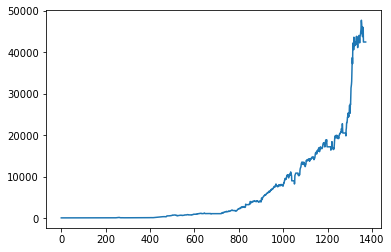

In [6]:
df.total.plot()

2000-09-01 00:00:00 277.0 100 False
2000-09-08 00:00:00 273.29998779296875 100 False
2000-09-15 00:00:00 272.29998779296875 100 False
2000-09-22 00:00:00 271.79998779296875 100 True
2000-09-29 00:00:00 273.6000061035156 100.66225842214457 True
2000-10-06 00:00:00 269.29998779296875 99.0802059925388 True
2000-10-13 00:00:00 272.3999938964844 100.22075280738152 True
2000-10-20 00:00:00 271.20001220703125 99.77925842057266 True
2000-10-27 00:00:00 264.3999938964844 97.27741198350569 True
2000-11-03 00:00:00 264.6000061035156 97.35099999528425 True
2000-11-10 00:00:00 264.5 97.31420598939496 True
2000-11-17 00:00:00 265.70001220703125 97.75571160415802 True
2000-12-01 00:00:00 268.70001220703125 98.85946441311145 True
2000-12-08 00:00:00 272.20001220703125 100.14717602355714 True
2000-12-15 00:00:00 270.3999938964844 99.48491760141255 True
2000-12-22 00:00:00 273.70001220703125 100.69905242803384 True
2000-12-29 00:00:00 272.0 100.07358801177854 True
2001-01-05 00:00:00 268.0 98.6019175998

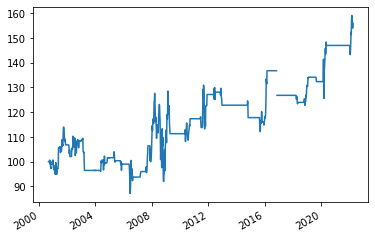

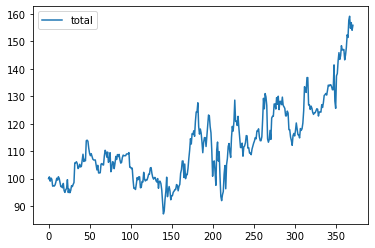

In [14]:
df = pd.read_pickle("0.12670742563044157.pkl")
total = 100
gold = yf.get_data("GC=F", start_date="1995-01-06",end_date = now, index_as_date = True)
bearish = False
prevGoldPrice = 0
newDf = pd.DataFrame()
newDf['total'] = 0
for index, element in df.iterrows():
    try:
        goldPrice = gold.loc[index].close
        if goldPrice != goldPrice:
            continue
        if len(element.holding) == 0:
            if bearish == False:
                bearish = True
            else:
                total = total*(goldPrice/prevGoldPrice)
            newDf = newDf.append({'total': total}, ignore_index = True)
        else:
            if bearish == True:
                total = total*(goldPrice/prevGoldPrice)
                bearish = False
                newDf = newDf.append({'total': total}, ignore_index = True)
        prevGoldPrice = gold.loc[index].close
        df.at[index,"goldTotal"] = total
        print(index, goldPrice, total,bearish)
        
    except:
        continue

fullPrint(df["goldTotal"])
df["goldTotal"].plot()
newDf.plot()
# print(df["total"])
newDf.to_pickle("gold.pkl")


100
112.26604586983593
119.80861754784922
112.32129165477323
132.6760663487068
132.62955862375944
133.8842342409719
131.8014434919851
130.74541951398086
125.79861708400884
123.06834219555924
120.96891101042264
119.17419442858296
117.93738655779813
117.03232437739136
122.74216882258044
169.27869957845678
174.03545174569805
170.40197931013833
179.31101597813156
173.05542617563302
171.4054147598383
166.76947265872326
162.66981756582356
160.92064441084312
166.60951710341712
162.5413135124048
161.09027363791049
164.72657110781407
162.38285600460372
166.03121788965825
166.5881619182064


<AxesSubplot:>

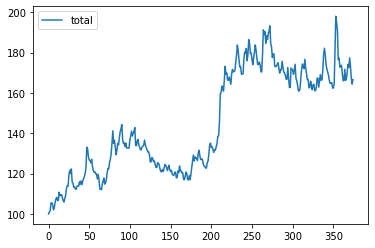

In [11]:
spDf = yf.get_data('^GSPC', start_date="1995-01-06",end_date = '2022-04-09', index_as_date = True)
spDf = spDf[~spDf.index.duplicated()]
spDf['close'] = spDf['close'].rolling(window=5).apply(lambda x: np.average(x))
spDf['Dates'] = pd.to_datetime(spDf.index)
spFDf = spDf[spDf['Dates'].dt.weekday == 4]
df = pd.read_pickle("0.12670742563044157.pkl")
df['shortSPYTotal'] = 100
df = df[df.index - pd.to_datetime('2000-09-01') > timedelta(0)]
newDf = pd.DataFrame()
newDf['total'] = 0
total = 100
gold = yf.get_data("GC=F", start_date="1995-01-06",end_date = now, index_as_date = True)
bearish = False
allocation = 0
originalTotal = 0
for index, element in df.iterrows():
    if len(element.holding) == 0:
        if allocation == 0:
            allocation = total / spFDf.loc[index].close
            print(total)
            originalTotal = total
        else:
            total = 2 * originalTotal - spFDf.loc[index].close * allocation
        newDf = newDf.append({'total': total}, ignore_index = True)
    elif allocation != 0:
        total = 2 * originalTotal - spFDf.loc[index].close * allocation
        allocation = 0
        originalTotal = 0
        newDf = newDf.append({'total': total}, ignore_index = True)
    df.loc[index,'shortSPYTotal'] = total

print(total)


# df['shortSPYTotal'].plot()
newDf.plot()

In [5]:
from bs4 import BeautifulSoup

with open('table.txt') as f:
    result = f.readlines()
resultString = ""
for str in result:
    resultString += str
soup = BeautifulSoup(resultString, "html.parser")
# print(soup)
# Creating list with all tables
table = soup.find('table', class_='table table-striped table-bordered table-hover table-condensed dataTable no-footer')
# print(tables)
for row in table.tbody.find_all('tr'):
    # Find all data for each column
    columns = row.find_all('td')
    # print(columns[0])
    if(columns != []):
        a = columns[0].text.strip()
        b = columns[1].text.strip()
        print(b)

DDDX
RSSFF
GGIFF
ARAFF
RDUFF
TKRFF
TLRS
SND
TGB
LEMIF
AMYZF
LGO
LMRMF
FTMNF
CFTN
USAS
GLDG
SLCA
DSVSF
FEAM
GRCAF
GPHOF
NSRPF
NEXA
AXU
NSRCF
IVPAF
AUGG
GSV
CMP
MNRL
GPHBF
TPRFF
ATUSF
PLM
MP
BLOZF
XPL
NAK
EMX
LYSDY
FCSMF
SIRE
CMCL
BHP
MGPHF
MNDJF
NGLOY
HUDRF
GLCNF
RIO
LTUM
IAALF
DRRSF
MLLOF
LCGMF
ATADF
ALKEF
AMNL
PGOL
NIOBF
GDLNF
AVLNF
CMRZF
NMG
NEWP
MWSNF
GHMP
SPRN
MDMN
MCOA
AXDDF
AUNFF


In [24]:
investpy.indices.get_index_historical_data('DJ Electronic Equipment', 'United States', '01/05/2002', '28/05/2022', as_json=False, order='ascending', interval='Daily')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-05-17,219.93,221.12,214.67,218.38,7722476,USD
2010-05-18,218.39,220.74,214.29,214.69,9305318,USD
2010-05-19,214.69,214.77,208.08,211.16,9383845,USD
2010-05-20,211.13,211.13,203.84,204.75,10935980,USD
2010-05-21,204.70,208.31,200.76,206.28,11992528,USD
...,...,...,...,...,...,...
2022-05-23,844.34,852.04,832.01,849.43,16697847,USD
2022-05-24,843.94,844.73,824.19,834.32,16261829,USD
2022-05-25,831.78,836.33,823.06,832.07,14745193,USD


In [6]:
investpy.get_indices_list(country= 'United States')

['NQ US Mid Cap Value',
 'NQ US Mid Cap Growth',
 'NQ US Mid Cap Telecommunications Equipment',
 'NQ US Mid Cap Semiconductors',
 'NQ US Mid Cap Computer Hardware',
 'NQ US Mid Cap Technology Hardware & Equipment',
 'NQ US Mid Cap Technology',
 'NQ US Mid Cap Software',
 'NQ US Mid Cap Software & Computer Services',
 'NQ US Mid Cap Investment Services',
 'NQ US Mid Cap Asset Managers',
 'NQ US Small Cap Oil & Gas',
 'NQ US Mid Cap Financial Service',
 'NQ US Mid Cap Financial Services Sector',
 'NQ US Mid Cap Mortgage REITs',
 'NQ US Small Cap Oil & Gas Producers',
 'NQ US Small Cap Forestry & Paper',
 'NQ US Small Cap Oil Equipment & Services',
 'NQ US Small Cap General Mining',
 'NQ US Small Cap Coal',
 'NQ US Mid Cap Specialty REITs',
 'NQ US Small Cap Mining',
 'NQ US Small Cap Iron & Steel',
 'NQ US Small Cap Nonferrous Metals',
 'NQ US Small Cap Industrial Metals & Mining',
 'NQ US Small Cap Paper',
 'NQ US Small Cap Basic Resources',
 'NQ US Small Cap Specialty Chemicals',
 'NQ 